### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

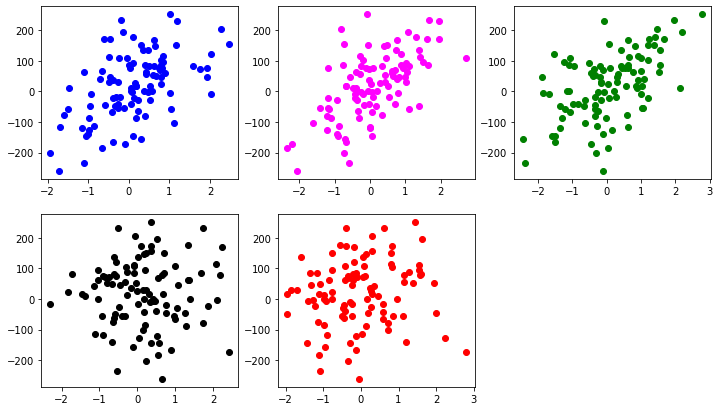

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,7)
x1=X[:,0]
x2=X[:,1]
x3=X[:,2]
x4=X[:,3]
x5=X[:,4]
plt.subplot(2, 3, 1)
plt.scatter(x1, y, c ="blue")
plt.subplot(2, 3, 2)
plt.scatter(x2, y, c ="magenta")
plt.subplot(2, 3, 3)
plt.scatter(x3, y, c ="green")
plt.subplot(2, 3, 4)
plt.scatter(x4, y, c ="black")
plt.subplot(2, 3, 5)
plt.scatter(x5, y, c ="red")

 
# To show the plot
plt.show()


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [4]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    def __init__(self, learning_rate=0.0005, n_iters=22000, bias=np.random.random(), weight=np.random.rand(np. size(X, 1))):
       self.learning_rate=learning_rate
       self.n_iters=n_iters
       self.bias=bias
       self.weight=weight

    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        num_records,num_features=X.shape
        for iter in range(self.n_iters):
          predictions_y=np.matmul(X,self.weight)+self.bias
          grad = np.zeros(num_features)
          error=y-predictions_y
          for feat in range(num_features):
            grad[feat] = (-2/num_records)*np.sum(np.multiply(X[:,feat],error))
          deltab=-2*np.sum(error)/num_records 
          self.bias=self.bias-self.learning_rate*deltab
          self.weight=self.weight-self.learning_rate*grad
          
   
     
    # This function will be called after our model has been trained and we are predicting on unseen data
    def predict(self, X):
        predict=np.matmul(X,self.weight)+self.bias
        return predict

### Initializing, Training & Predictions

In [5]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)

predictions = regressor.predict(X_test) # pass appropriate part of dataset

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [6]:
def mean_squared_error(y_true, y_pred):
  error=y_true-y_pred
  n=y_true.shape[0]
  mse =(1/n)*(np.sum(np.multiply(error, error)))
  return mse
       


def r2_score(y_true, y_pred):
      #1-ssr/sst
      error=y_true-y_pred
      mean=np.mean(y_true)
      ssr =np.sum(np.multiply(error,error)) # sum squared regression (SSR)
      sst=np.sum(np.multiply(y_true-mean,y_true-mean)) # total sum of squares (SST)
      r2 = 1-ssr/sst
      return r2
              

mse = mean_squared_error(y_test,predictions) 
print("MSE:", mse)

accu = r2_score(y_test,predictions) 
print("Accuracy:", accu)

MSE: 391.0954827735972
Accuracy: 0.9630263051517128
